In [67]:
import os, shutil, random
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.image as mpimg
import keras
from keras import models
from keras import layers
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras import models
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten, Activation, BatchNormalization
from keras.regularizers import l2
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.utils import class_weight

In [2]:
!find . -name ".DS_Store" -delete

In [3]:
img_dir = 'Human_Face_Regonition_Images'

part_1_dir = os.path.join(img_dir, 'part1')
part_1_dir

'Human_Face_Regonition_Images\\part1'

In [4]:
len(os.listdir(part_1_dir))

10137

In [5]:
part_2_dir = os.path.join(img_dir, 'part2')
part_2_dir

'Human_Face_Regonition_Images\\part2'

In [6]:
len(os.listdir(part_2_dir))

10719

In [7]:
part_3_dir = os.path.join(img_dir, 'part3')
part_3_dir

'Human_Face_Regonition_Images\\part3'

In [8]:
len(os.listdir(part_3_dir))

3252

In [9]:
img_dir = 'Human_Face_Regonition_Images\\images\\'
os.mkdir(img_dir)

In [10]:
imgs_1= [file for file in os.listdir(part_1_dir) if file.endswith('.jpg')]

for img in imgs_1:
    origin = os.path.join(part_1_dir, img)
    destination = os.path.join(img_dir, img)
    shutil.copyfile(origin, destination)

In [11]:
imgs_2= [file for file in os.listdir(part_2_dir) if file.endswith('.jpg')]

for img in imgs_2:
    origin = os.path.join(part_2_dir, img)
    destination = os.path.join(img_dir, img)
    shutil.copyfile(origin, destination)

In [12]:
imgs_3= [file for file in os.listdir(part_3_dir) if file.endswith('.jpg')]

for img in imgs_3:
    origin = os.path.join(part_3_dir, img)
    destination = os.path.join(img_dir, img)
    shutil.copyfile(origin, destination)

In [13]:
len(os.listdir(img_dir))

24106

In [14]:
os.listdir(img_dir)

['100_0_0_20170112213500903.jpg',
 '100_0_0_20170112215240346.jpg',
 '100_1_0_20170110183726390.jpg',
 '100_1_0_20170112213001988.jpg',
 '100_1_0_20170112213303693.jpg',
 '100_1_0_20170112215032192.jpg',
 '100_1_0_20170117195420803.jpg',
 '100_1_0_20170119212053665.jpg',
 '100_1_2_20170105174847679.jpg',
 '100_1_2_20170110182836729.jpg',
 '100_1_2_20170112213615815.jpg',
 '100_1_2_20170112222336458.jpg',
 '101_0_0_20170112213500903.jpg',
 '101_1_2_20170105174739309.jpg',
 '103_0_2_20170112213001988.jpg',
 '105_0_0_20170112213001988.jpg',
 '105_1_0_20170112213001988.jpg',
 '105_1_0_20170112213021902.jpg',
 '105_1_0_20170112213507183.jpg',
 '105_1_1_20170112213303693.jpg',
 '10_0_0_20161220222308131.jpg',
 '10_0_0_20170103200329407.jpg',
 '10_0_0_20170103200522151.jpg',
 '10_0_0_20170103233459275.jpg',
 '10_0_0_20170104013211746.jpg',
 '10_0_0_20170110215927291.jpg',
 '10_0_0_20170110220033115.jpg',
 '10_0_0_20170110220111082.jpg',
 '10_0_0_20170110220235233.jpg',
 '10_0_0_20170110220251

In [15]:
os.listdir(img_dir)[0][:-26]

'100'

[age]_[gender]_[race]_[date&time].jpg

- age is an integer from 0 to 116, indicating the age
- race is an integer from 0 to 4, denoting White, Black, Asian, Indian, and Others (like Hispanic, Latino, Middle Eastern).

In [16]:
ages = [name[:-26] for name in os.listdir(img_dir)]
ethnicities = [name[-23:-22] for name in os.listdir(img_dir)]

In [17]:
labels = pd.DataFrame({'age' : ages, 'ethnicity' : ethnicities})

In [18]:
labels

,age,ethnicity
0,100,0
1,100,0
2,100,0
3,100,0
4,100,0
...,...,...
24101,9,3
24102,9,3
24103,9,4
24104,9,4


## Create Train/Validation/Test Folders

In [19]:
img_dir = 'Human_Face_Regonition_Images'

# Train Folder
train_dir = os.path.join(img_dir, 'train')
os.mkdir(train_dir)

# Validation Folder
validation_dir = os.path.join(img_dir, 'validation')
os.mkdir(validation_dir)

# Test Folder
test_dir = os.path.join(img_dir, 'test')
os.mkdir(test_dir)

In [20]:
train_dir

'Human_Face_Regonition_Images\\train'

From the images folder, we will take 16,000 random images to train folder and 8,106 random images to validation folder.

In [21]:
total_imgs_dir = 'Human_Face_Regonition_Images\\images\\'

total_imgs= [file for file in os.listdir(total_imgs_dir) if file.endswith('.jpg')]

train_imgs = random.sample(total_imgs, 14000)

for img in train_imgs:
    origin = os.path.join(total_imgs_dir, img)
    destination = os.path.join(train_dir, img)
    shutil.copyfile(origin, destination)

In [22]:
len(train_imgs)

14000

In [23]:
rest_imgs = [image for image in total_imgs if image not in train_imgs]

validation_imgs = random.sample(rest_imgs, 7000)

for img in validation_imgs:
    origin = os.path.join(total_imgs_dir, img)
    destination = os.path.join(validation_dir, img)
    shutil.copyfile(origin, destination)

In [24]:
len(validation_imgs)

7000

In [25]:
test_imgs = [image for image in rest_imgs if image not in validation_imgs]

for img in test_imgs:
    origin = os.path.join(total_imgs_dir, img)
    destination = os.path.join(test_dir, img)
    shutil.copyfile(origin, destination)

In [26]:
len(test_imgs)

3106

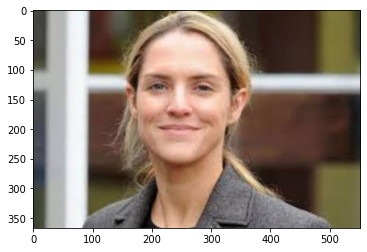

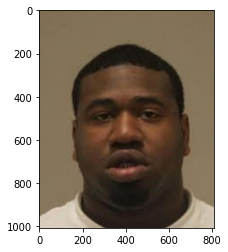

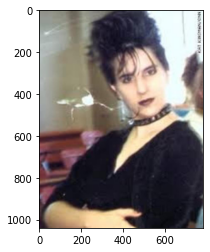

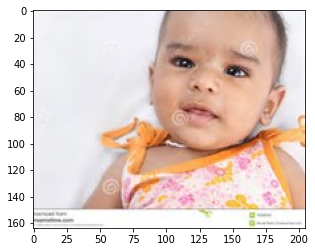

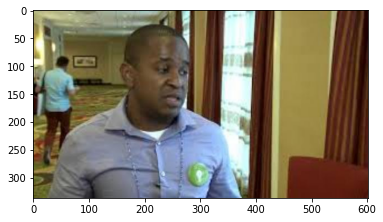

In [86]:
imgs = [mpimg.imread(total_imgs_dir+img) for img in random.sample(total_imgs,5)]

for n in range(5):
    plt.imshow(imgs[n])
    plt.show();

From the train images, we will create labels dataframe.

In [27]:
train_ages = [name.split('_')[0] for name in train_imgs]

train_labels = pd.DataFrame({'age' : train_ages})

In [28]:
train_labels

,age
0,26
1,33
2,34
3,25
4,52
...,...
13995,50
13996,26
13997,26
13998,28


We will bin the ages to 0-2, 3-5, 6-10, 11-20, 21-30, 31-40, 41-50, 51-60, 61-70, 71-80, 80+.
- 0 : 0-2
- 1 : 3-5
- 2 : 6-10
- 3 : 11-20
- 4 : 21-30
- 5 : 31-40
- 6 : 41-50
- 7 : 51-60
- 8 : 61-70
- 9 : 71-80
-10 : 80+

In [29]:
train_labels['age'] = train_labels['age'].map(lambda x: int(float(x.replace('"', ''))))

In [30]:
train_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14000 entries, 0 to 13999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     14000 non-null  int64
dtypes: int64(1)
memory usage: 109.5 KB


In [31]:
bins = [0, 2, 5, 10, 20, 30, 40, 50, 60, 70, 80, np.inf]
names = ['0-2', '3-5', '6-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '80+']

train_labels['AgeRange'] = pd.cut(train_labels['age'], bins, labels=names)

In [32]:
train_labels.head()

,age,AgeRange
0,26,21-30
1,33,31-40
2,34,31-40
3,25,21-30
4,52,51-60


Now, we are going to separate each images to their own age's bin's folder.

In [33]:
# Get indexes of each age bins
age_0_2_index = list(train_labels[train_labels['AgeRange'] == '0-2'].index)
age_3_5_index = list(train_labels[train_labels['AgeRange'] == '3-5'].index)
age_6_10_index = list(train_labels[train_labels['AgeRange'] == '6-10'].index)
age_11_20_index = list(train_labels[train_labels['AgeRange'] == '11-20'].index)
age_21_30_index = list(train_labels[train_labels['AgeRange'] == '21-30'].index)
age_31_40_index = list(train_labels[train_labels['AgeRange'] == '31-40'].index)
age_41_50_index = list(train_labels[train_labels['AgeRange'] == '41-50'].index)
age_51_60_index = list(train_labels[train_labels['AgeRange'] == '51-60'].index)
age_61_70_index = list(train_labels[train_labels['AgeRange'] == '61-70'].index)
age_71_80_index = list(train_labels[train_labels['AgeRange'] == '71-80'].index)
age_80_index = list(train_labels[train_labels['AgeRange'] == '80+'].index)

In [34]:
# Get images from the indexes
age_0_2_imgs = [train_imgs[index] for index in age_0_2_index]
age_3_5_imgs = [train_imgs[index] for index in age_3_5_index]
age_6_10_imgs = [train_imgs[index] for index in age_6_10_index]
age_11_20_imgs = [train_imgs[index] for index in age_11_20_index]
age_21_30_imgs = [train_imgs[index] for index in age_21_30_index]
age_31_40_imgs = [train_imgs[index] for index in age_31_40_index]
age_41_50_imgs = [train_imgs[index] for index in age_41_50_index]
age_51_60_imgs = [train_imgs[index] for index in age_51_60_index]
age_61_70_imgs = [train_imgs[index] for index in age_61_70_index]
age_71_80_imgs = [train_imgs[index] for index in age_71_80_index]
age_80_imgs = [train_imgs[index] for index in age_80_index]

In [35]:
def copy_image_to_new_folder(images, list_name, folder_name):
    os.mkdir(os.path.join(folder_name, list_name))
    
    for img in images:
        origin = os.path.join(folder_name, img)
        destination = os.path.join(os.path.join(folder_name, list_name), img)
        shutil.copyfile(origin, destination)

In [36]:
copy_image_to_new_folder(age_0_2_imgs, 'age_0_2_imgs', train_dir)
copy_image_to_new_folder(age_3_5_imgs, 'age_3_5_imgs', train_dir)
copy_image_to_new_folder(age_6_10_imgs, 'age_6_10_imgs', train_dir)
copy_image_to_new_folder(age_11_20_imgs, 'age_11_20_imgs', train_dir)
copy_image_to_new_folder(age_21_30_imgs, 'age_21_30_imgs', train_dir)
copy_image_to_new_folder(age_31_40_imgs, 'age_31_40_imgs', train_dir)
copy_image_to_new_folder(age_41_50_imgs, 'age_41_50_imgs', train_dir)
copy_image_to_new_folder(age_51_60_imgs, 'age_51_60_imgs', train_dir)
copy_image_to_new_folder(age_61_70_imgs, 'age_61_70_imgs', train_dir)
copy_image_to_new_folder(age_71_80_imgs, 'age_71_80_imgs', train_dir)
copy_image_to_new_folder(age_80_imgs, 'age_80_imgs', train_dir)

From the validation images, we will create labels dataframe.

In [37]:
validation_ages = [name.split('_')[0] for name in validation_imgs]

validation_labels = pd.DataFrame({'age' : validation_ages})

In [38]:
validation_labels

,age
0,18
1,18
2,1
3,40
4,34
...,...
6995,44
6996,6
6997,67
6998,41


In [39]:
validation_labels['age'] = validation_labels['age'].map(lambda x: int(float(x.replace('"', ''))))

bins = [0, 2, 5, 10, 20, 30, 40, 50, 60, 70, 80, np.inf]
names = ['0-2', '3-5', '6-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '80+']

validation_labels['AgeRange'] = pd.cut(validation_labels['age'], bins, labels=names)

In [40]:
validation_labels.head()

,age,AgeRange
0,18,11-20
1,18,11-20
2,1,0-2
3,40,31-40
4,34,31-40


In [41]:
# Get indexes of each age bins
age_0_2_index = list(validation_labels[validation_labels['AgeRange'] == '0-2'].index)
age_3_5_index = list(validation_labels[validation_labels['AgeRange'] == '3-5'].index)
age_6_10_index = list(validation_labels[validation_labels['AgeRange'] == '6-10'].index)
age_11_20_index = list(validation_labels[validation_labels['AgeRange'] == '11-20'].index)
age_21_30_index = list(validation_labels[validation_labels['AgeRange'] == '21-30'].index)
age_31_40_index = list(validation_labels[validation_labels['AgeRange'] == '31-40'].index)
age_41_50_index = list(validation_labels[validation_labels['AgeRange'] == '41-50'].index)
age_51_60_index = list(validation_labels[validation_labels['AgeRange'] == '51-60'].index)
age_61_70_index = list(validation_labels[validation_labels['AgeRange'] == '61-70'].index)
age_71_80_index = list(validation_labels[validation_labels['AgeRange'] == '71-80'].index)
age_80_index = list(validation_labels[validation_labels['AgeRange'] == '80+'].index)

In [42]:
# Get images from the indexes
age_0_2_imgs = [validation_imgs[index] for index in age_0_2_index]
age_3_5_imgs = [validation_imgs[index] for index in age_3_5_index]
age_6_10_imgs = [validation_imgs[index] for index in age_6_10_index]
age_11_20_imgs = [validation_imgs[index] for index in age_11_20_index]
age_21_30_imgs = [validation_imgs[index] for index in age_21_30_index]
age_31_40_imgs = [validation_imgs[index] for index in age_31_40_index]
age_41_50_imgs = [validation_imgs[index] for index in age_41_50_index]
age_51_60_imgs = [validation_imgs[index] for index in age_51_60_index]
age_61_70_imgs = [validation_imgs[index] for index in age_61_70_index]
age_71_80_imgs = [validation_imgs[index] for index in age_71_80_index]
age_80_imgs = [validation_imgs[index] for index in age_80_index]

In [43]:
copy_image_to_new_folder(age_0_2_imgs, 'age_0_2_imgs', validation_dir)
copy_image_to_new_folder(age_3_5_imgs, 'age_3_5_imgs', validation_dir)
copy_image_to_new_folder(age_6_10_imgs, 'age_6_10_imgs', validation_dir)
copy_image_to_new_folder(age_11_20_imgs, 'age_11_20_imgs', validation_dir)
copy_image_to_new_folder(age_21_30_imgs, 'age_21_30_imgs', validation_dir)
copy_image_to_new_folder(age_31_40_imgs, 'age_31_40_imgs', validation_dir)
copy_image_to_new_folder(age_41_50_imgs, 'age_41_50_imgs', validation_dir)
copy_image_to_new_folder(age_51_60_imgs, 'age_51_60_imgs', validation_dir)
copy_image_to_new_folder(age_61_70_imgs, 'age_61_70_imgs', validation_dir)
copy_image_to_new_folder(age_71_80_imgs, 'age_71_80_imgs', validation_dir)
copy_image_to_new_folder(age_80_imgs, 'age_80_imgs', validation_dir)

From the test images, we will create labels dataframe.

In [44]:
test_ages = [name.split('_')[0] for name in test_imgs]

test_labels = pd.DataFrame({'age' : test_ages})

In [45]:
test_labels

,age
0,100
1,101
2,105
3,105
4,105
...,...
3101,9
3102,9
3103,9
3104,9


In [46]:
test_labels['age'] = test_labels['age'].map(lambda x: int(float(x.replace('"', ''))))

bins = [0, 2, 5, 10, 20, 30, 40, 50, 60, 70, 80, np.inf]
names = ['0-2', '3-5', '6-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '80+']

test_labels['AgeRange'] = pd.cut(test_labels['age'], bins, labels=names)

In [47]:
test_labels.head()

,age,AgeRange
0,100,80+
1,101,80+
2,105,80+
3,105,80+
4,105,80+


In [48]:
# Get indexes of each age bins
age_0_2_index = list(test_labels[test_labels['AgeRange'] == '0-2'].index)
age_3_5_index = list(test_labels[test_labels['AgeRange'] == '3-5'].index)
age_6_10_index = list(test_labels[test_labels['AgeRange'] == '6-10'].index)
age_11_20_index = list(test_labels[test_labels['AgeRange'] == '11-20'].index)
age_21_30_index = list(test_labels[test_labels['AgeRange'] == '21-30'].index)
age_31_40_index = list(test_labels[test_labels['AgeRange'] == '31-40'].index)
age_41_50_index = list(test_labels[test_labels['AgeRange'] == '41-50'].index)
age_51_60_index = list(test_labels[test_labels['AgeRange'] == '51-60'].index)
age_61_70_index = list(test_labels[test_labels['AgeRange'] == '61-70'].index)
age_71_80_index = list(test_labels[test_labels['AgeRange'] == '71-80'].index)
age_80_index = list(test_labels[test_labels['AgeRange'] == '80+'].index)

In [49]:
# Get images from the indexes
age_0_2_imgs = [test_imgs[index] for index in age_0_2_index]
age_3_5_imgs = [test_imgs[index] for index in age_3_5_index]
age_6_10_imgs = [test_imgs[index] for index in age_6_10_index]
age_11_20_imgs = [test_imgs[index] for index in age_11_20_index]
age_21_30_imgs = [test_imgs[index] for index in age_21_30_index]
age_31_40_imgs = [test_imgs[index] for index in age_31_40_index]
age_41_50_imgs = [test_imgs[index] for index in age_41_50_index]
age_51_60_imgs = [test_imgs[index] for index in age_51_60_index]
age_61_70_imgs = [test_imgs[index] for index in age_61_70_index]
age_71_80_imgs = [test_imgs[index] for index in age_71_80_index]
age_80_imgs = [test_imgs[index] for index in age_80_index]

In [50]:
copy_image_to_new_folder(age_0_2_imgs, 'age_0_2_imgs', test_dir)
copy_image_to_new_folder(age_3_5_imgs, 'age_3_5_imgs', test_dir)
copy_image_to_new_folder(age_6_10_imgs, 'age_6_10_imgs', test_dir)
copy_image_to_new_folder(age_11_20_imgs, 'age_11_20_imgs', test_dir)
copy_image_to_new_folder(age_21_30_imgs, 'age_21_30_imgs', test_dir)
copy_image_to_new_folder(age_31_40_imgs, 'age_31_40_imgs', test_dir)
copy_image_to_new_folder(age_41_50_imgs, 'age_41_50_imgs', test_dir)
copy_image_to_new_folder(age_51_60_imgs, 'age_51_60_imgs', test_dir)
copy_image_to_new_folder(age_61_70_imgs, 'age_61_70_imgs', test_dir)
copy_image_to_new_folder(age_71_80_imgs, 'age_71_80_imgs', test_dir)
copy_image_to_new_folder(age_80_imgs, 'age_80_imgs', test_dir)

In [51]:
train_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        train_dir, 
        target_size=(64, 64), batch_size=14000)

validation_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        validation_dir, 
        target_size=(64, 64), batch_size=7000)

test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        test_dir, 
        target_size=(64, 64), batch_size=3106)

Found 14000 images belonging to 11 classes.
Found 7000 images belonging to 11 classes.
Found 3106 images belonging to 11 classes.


In [52]:
train_imgs, train_labels = next(train_generator)
validation_imgs, validation_labels = next(validation_generator)
test_imgs, test_labels = next(test_generator)

In [53]:
print(train_imgs.shape, validation_imgs.shape, test_imgs.shape)

(14000, 64, 64, 3) (7000, 64, 64, 3) (3106, 64, 64, 3)


In [54]:
train_images = train_imgs.reshape(train_imgs.shape[0], -1)
validation_images = validation_imgs.reshape(validation_imgs.shape[0], -1)
test_images = test_imgs.reshape(test_imgs.shape[0], -1)

In [55]:
print(train_images.shape, validation_images.shape, test_images.shape)

(14000, 12288) (7000, 12288) (3106, 12288)


In [61]:
train_label = train_labels[:,0].reshape(train_labels.shape[0], 1)
validation_label = validation_labels[:,0].reshape(validation_labels.shape[0], 1)
test_label = test_labels[:,0].reshape(test_labels.shape[0], 1)

In [62]:
print(train_label.shape, validation_label.shape, test_label.shape)

(14000, 1) (7000, 1) (3106, 1)


## Baseline Model

In [68]:
model = models.Sequential()
model.add(layers.Dense(15, activation='relu', input_shape=(12288,)))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

result = model.fit(train_images,
                    train_label,
                    epochs=150,
                    batch_size=64,
                    validation_data=(validation_images, validation_label))

Epoch 1/50
219/219 [==============================] - 1s 5ms/step - loss: 0.3178 - accuracy: 0.9206 - val_loss: 0.2896 - val_accuracy: 0.9253
Epoch 2/50
219/219 [==============================] - 1s 5ms/step - loss: 0.2830 - accuracy: 0.9249 - val_loss: 0.2703 - val_accuracy: 0.9253
Epoch 3/50
219/219 [==============================] - 1s 4ms/step - loss: 0.2623 - accuracy: 0.9249 - val_loss: 0.2589 - val_accuracy: 0.9253
Epoch 4/50
219/219 [==============================] - 1s 4ms/step - loss: 0.2495 - accuracy: 0.9249 - val_loss: 0.2535 - val_accuracy: 0.9253
Epoch 5/50
219/219 [==============================] - 1s 4ms/step - loss: 0.2426 - accuracy: 0.9249 - val_loss: 0.2477 - val_accuracy: 0.9253
Epoch 6/50
219/219 [==============================] - 1s 4ms/step - loss: 0.2365 - accuracy: 0.9249 - val_loss: 0.2420 - val_accuracy: 0.9253
Epoch 7/50
219/219 [==============================] - 1s 5ms/step - loss: 0.2339 - accuracy: 0.9250 - val_loss: 0.2540 - val_accuracy: 0.9253
Epoch 

In [87]:
def plot_loss_accuracy(result):
    history = result.history

    plt.figure()
    plt.plot(history['val_loss'])
    plt.plot(history['loss'])
    plt.legend(['val_loss', 'loss'])
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
    
    plt.figure()
    plt.plot(history['val_accuracy'])
    plt.plot(history['accuracy'])
    plt.legend(['val_accuracy', 'accuracy'])
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.show()

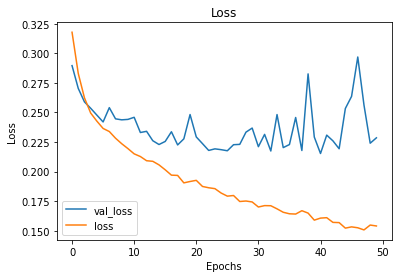

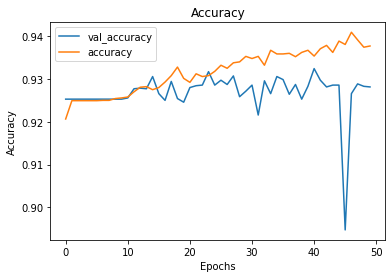

In [88]:
plot_loss_accuracy(result)

In [69]:
result_train = model.evaluate(train_images, train_label)
result_train

438/438 [==============================] - 1s 1ms/step - loss: 0.1355 - accuracy: 0.9418


[0.13545754551887512, 0.9417856931686401]

In [70]:
result_test = model.evaluate(test_images, test_label)
result_test

98/98 [==============================] - 0s 1ms/step - loss: 0.2429 - accuracy: 0.9240


[0.24286140501499176, 0.9240180253982544]

## CNN

In [ ]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))


model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['accuracy'])

history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=10,
                              validation_data=validation_generator,
                              validation_steps=50)